### Import Libraries

In [6]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=2bd32fd91b7f2e3cc8a4e723a83d439e1634d3c757f7485dbb446e97be6f299a
  Stored in directory: c:\users\cash crusaders\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import os
import argparse
from imutils import paths

### Import dataset

In [2]:
dataset = r'C:\Users\Cash Crusaders\Desktop\My Portfolio\Projects\Data Science Projects\Deep Learning Project 1  - Corona Virus Detection ( Using Chest Xray Images)\dataset//'

In [25]:
init_learning_rate = 1e-3 # initial learning rate
epochs = 15 # number of iterations for the model
batch_size = 8 # nummber of items/ pictures trained at once

In [4]:
args ={}
args['dataset'] = dataset

In [5]:
args

{'dataset': 'C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Deep Learning Project 1  - Corona Virus Detection ( Using Chest Xray Images)\\dataset//'}

### Extract the dataset

In [6]:
import cv2
import numpy as np
img_paths = list(paths.list_images(args['dataset'])) # get the image paths and place them in a list
data = []
labels = []
for img_path in img_paths:
    label = img_path.split(os.path.sep)[-2] # split the image paths
    image = cv2.imread(img_path) # get the image 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert the image to be gray
    image = cv2.resize(image, (224, 224)) # resize the image
    data.append(image) # place the image into the data list
    labels.append(label) # get the path in the labels list
data = np.array(data) / 255.0 # convert the data  to an array and divide it with 255
labels = np.array(labels)

In [7]:
Covid_imgs = os.listdir(dataset+"Covid") # get covid images from the directory
Normal_imgs = os.listdir(dataset+"Normal") # get normal images from the directory

### Compare the Covid and Normal X-Ray Images

In [8]:
import skimage
from skimage.transform import rescale, resize, downscale_local_mean

Normal Chest vs Covid-19 Chest X-Ray


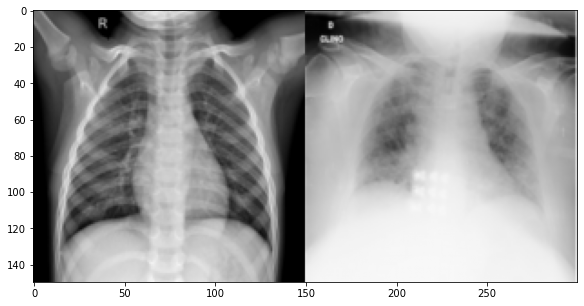

Normal Chest vs Covid-19 Chest X-Ray


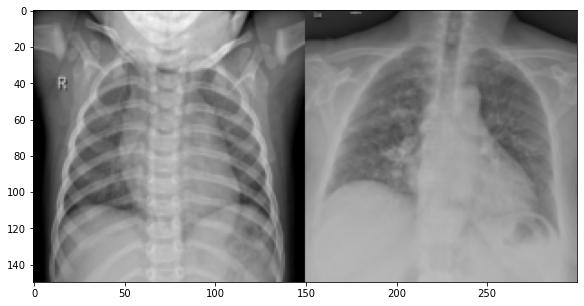

Normal Chest vs Covid-19 Chest X-Ray


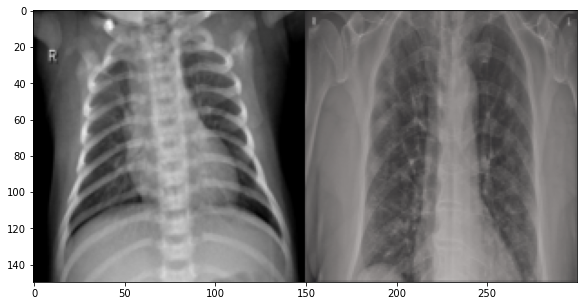

Normal Chest vs Covid-19 Chest X-Ray


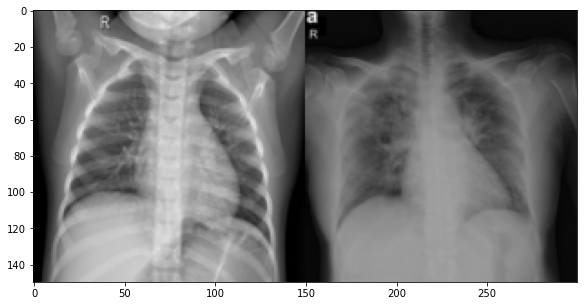

Normal Chest vs Covid-19 Chest X-Ray


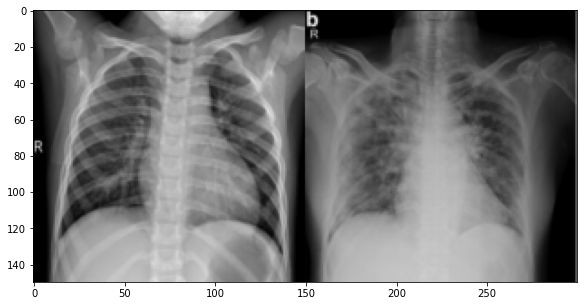

In [9]:
def image_plotter(num):
    '''this function gets the covid and normal image and concentanate them to observe the difference'''
    normal = cv2.imread(dataset+'Normal//'+Normal_imgs[num]) # get the normal image from the normal images
    normal = resize(normal, (150, 150, 3)) # resize the image
    corona_virus = cv2.imread(dataset+'Covid//'+Covid_imgs[num]) # get the covid image from the normal images
    corona_virus = resize(corona_virus, (150, 150, 3), mode = 'reflect') # resize the image
    pair = np.concatenate((normal, corona_virus), axis = 1)
    print("Normal Chest vs Covid-19 Chest X-Ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

for i in range(0,5):
    image_plotter(i)

In [10]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels) # convert the labeled array back into one hot vector
print()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.20, stratify=labels, random_state = 42)
train_Aug = ImageDataGenerator(rotation_range=15, fill_mode='nearest') # create more augmented images

### Model Building

In [13]:
# VGG15 has bee trained  we do not train it from scratch it is a pre trained model, weight and biases are already trained
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3))) # base model
head_model = base_model.output # head model, whatever the output is from the base model, it is gonna connect with the new head model
head_model = AveragePooling2D(pool_size = (4, 4))(head_model) # extract an average from the model matrices
head_model = Flatten(name = 'flatten')(head_model) 
head_model = Dense(64, activation = 'relu')(head_model)
head_model = Dropout(0.5)(head_model) # prevents the model from overfitting
head_model = Dense(2, activation='softmax')(head_model) # dense layer of 2 units because we have normal picture and covid picture for output
model = Model(inputs = base_model.input, outputs = head_model) # head model is the output
for layer in base_model.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 194s 3us/step


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

#### Displaying pictures randomly

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


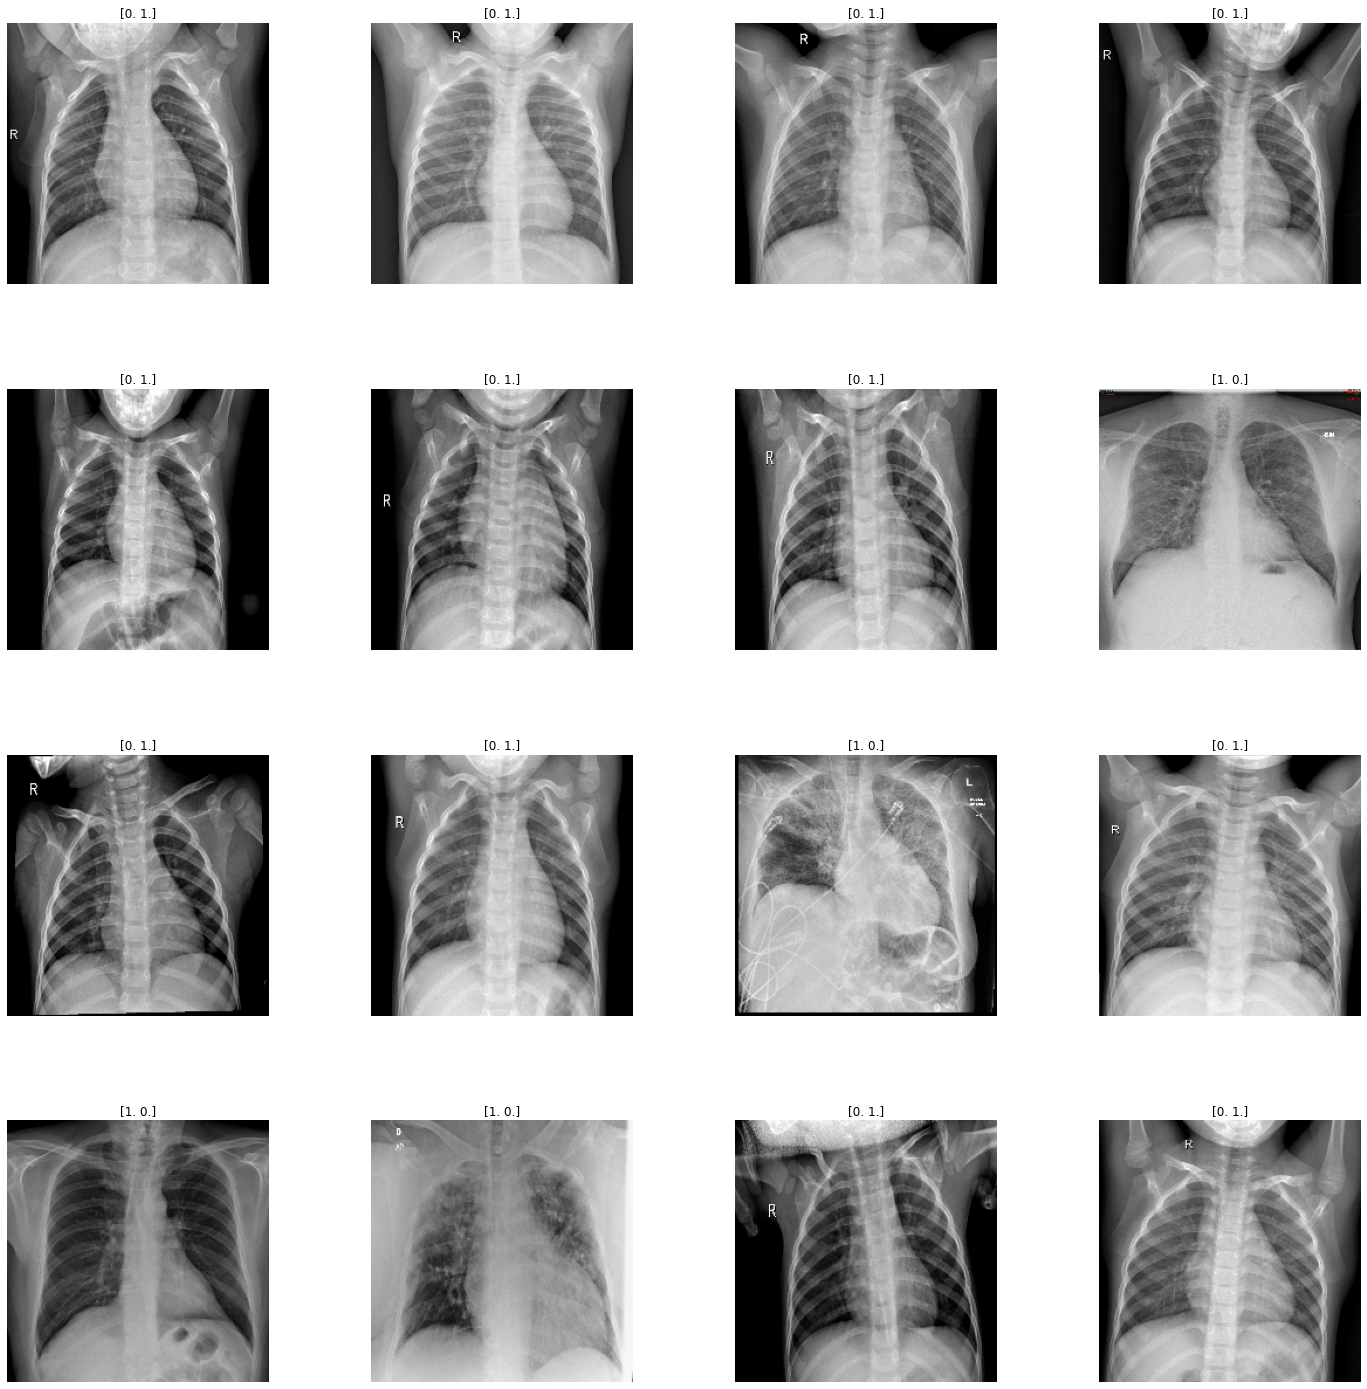

In [16]:
width_grid = 4
lenght_grid = 4
fig, axes = plt.subplots(lenght_grid, width_grid, figsize = (25, 25)) # subplots
axes = axes.ravel()
nb_training = len(X_train)
# go through the images and display them randomly
for i in np.arange(0, lenght_grid*width_grid):
    index = np.random.randint(0, nb_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

#### Train the model

In [19]:
opt = Adam(lr = init_learning_rate, decay = init_learning_rate/epochs)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
print("compiling Stats")

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


compiling Stats


In [31]:
R = model.fit_generator(train_Aug.flow( X_train, y_train, batch_size = batch_size), steps_per_epoch = len(X_train)//batch_size,
                       validation_data = (X_test, y_test), validation_steps = len(X_test)//batch_size, epochs = epochs)

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
20/20 [==============================] - 48s 2s/step - loss: 0.4143 - accuracy: 0.9438 - val_loss: 0.3866 - val_accuracy: 0.9250
Epoch 2/15
20/20 [==============================] - 49s 2s/step - loss: 0.3592 - accuracy: 0.9500 - val_loss: 0.3259 - val_accuracy: 1.0000
Epoch 3/15
20/20 [==============================] - 51s 3s/step - loss: 0.3219 - accuracy: 0.9500 - val_loss: 0.2729 - val_accuracy: 1.0000
Epoch 4/15
20/20 [==============================] - 51s 3s/step - loss: 0.2432 - accuracy: 0.9625 - val_loss: 0.2299 - val_accuracy: 1.0000
Epoch 5/15
20/20 [==============================] - 52s 3s/step - loss: 0.1946 - accuracy: 0.9688 - val_loss: 0.1966 - val_accuracy: 1.0000
Epoch 6/15
20/20 [==============================] - 52s 3s/step - loss: 0.1947 - accuracy: 0.9750 - val_loss: 0.1694 - val_accuracy: 1.0000
Epoch 7/15
20/20 [==============================] - 52s 3s/step - loss: 0.1798 - accuracy: 0.9563 - val_loss: 0.1582 - val_accuracy: 1.0000
Epoch 8/15
20/20 [==

#### Model Evaluation

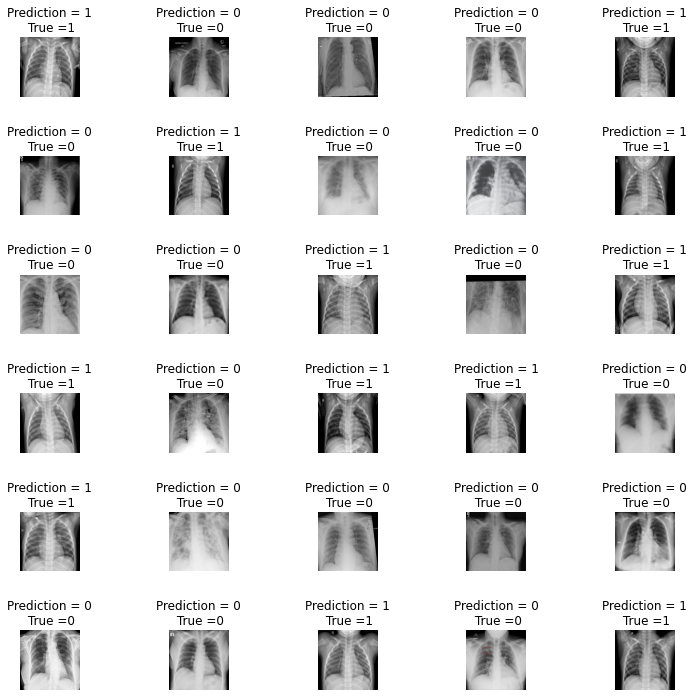

In [32]:
l = 6
w = 5
fig, axes = plt.subplots(l, w, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size = 85)
for i in np.arange(0, l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True ={}'.format(y_pred.argmax(axis=1)[i], y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1, hspace = 1)

In [33]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size = 85)
y_pred = np.argmax(y_pred, axis = 1)
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = LB.classes_))

                 precision    recall  f1-score   support

 dataset//Covid       1.00      1.00      1.00        20
dataset//Normal       1.00      1.00      1.00        20

       accuracy                           1.00        40
      macro avg       1.00      1.00      1.00        40
   weighted avg       1.00      1.00      1.00        40



In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0]/(cm[0, 0] + cm[1, 1])
specificity = cm[1, 1]/(cm[1, 0] + cm[1, 1])
print(cm)
print("accuracy:{:.4f}".format(acc))
print("sensitivity:{:.4f}".format(sensitivity))
print("specificity:{:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
accuracy:1.0000
sensitivity:0.5000
specificity:1.0000


### Plot the loss and the accuracy

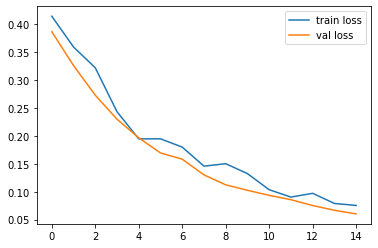

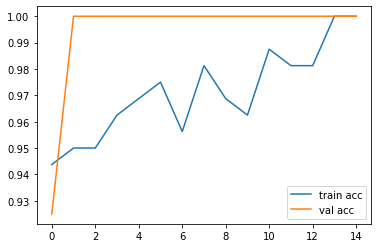

In [40]:
# loss
plt.plot(R.history['loss'], label = 'train loss')
plt.plot(R.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('val_loss')

# accuracy
plt.plot(R.history['accuracy'], label = 'train acc')
plt.plot(R.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

In [41]:
# save model
model.save(r'C:\Users\Cash Crusaders\Desktop\My Portfolio\Projects\Data Science Projects\Deep Learning Project 1  - Corona Virus Detection ( Using Chest Xray Images)\model.h5')

### Testing the model on Individual images

In [46]:
import tensorflow as tf
from keras.preprocessing import image
model = tf.rkeras.models.load_model('C:\Users\Cash Crusaders\Desktop\My Portfolio\Projects\Data Science Projects\Deep Learning Project 1  - Corona Virus Detection ( Using Chest Xray Images)\model.h5')
from keras.applications.vgg16 import preprocess_input


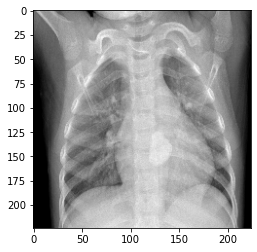

In [56]:
# take a random image and do the prediction
img = image.load_img(r'C:\Users\Cash Crusaders\Desktop\My Portfolio\Projects\Data Science Projects\Deep Learning Project 1  - Corona Virus Detection ( Using Chest Xray Images)\dataset\Normal\IM-0178-0001.jpeg',target_size=(224, 224))
img_plot = plt.imshow(img)

In [57]:
# convert the image into an array
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [58]:
# proprocess the image
img_data = preprocess_input(X)

In [59]:
classes  = model.predict(img_data)
new_pred = np.argmax(classes, axis=1)
if new_pred==[1]:
    print("Prediction: Normal")
else:
    print("Prediction: Corona Virus")

Prediction: Normal
